In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
!ls

concat.png	     penguins_adelie.csv     sample_data
merge_leftright.png  penguins_chinstrap.csv  sex_data_penguins.csv
merge.png	     penguins_gentoo.csv


In [3]:
# load single files
adelie_df=pd.read_csv('penguins_adelie.csv', index_col=0)
chinstrap_df=pd.read_csv('penguins_chinstrap.csv', index_col=0)
gentoo_df=pd.read_csv('penguins_gentoo.csv', index_col=0)
sex_data_df=pd.read_csv('sex_data_penguins.csv')

In [27]:
sex_data_df_2=pd.read_csv('sex_data_penguins.csv')

In [4]:
# automate the "read"
import os 

In [5]:
#return results of ls as a list
os.listdir()

['.config',
 'penguins_chinstrap.csv',
 'concat.png',
 'merge_leftright.png',
 'penguins_gentoo.csv',
 'penguins_adelie.csv',
 'merge.png',
 'sex_data_penguins.csv',
 'sample_data']

In [6]:
# load multiple dataframes into a list
df_list=[]
for file in os.listdir():
  if file.startswith('penguins'):
    df=pd.read_csv(file)
    df_list.append(df)

In [7]:
df_list   # a list that contains multiple dataframes 

[   studyName  Sample Number  ... Body Mass (g) Comments
 0    PAL0708              1  ...        3500.0      NaN
 1    PAL0708              2  ...        3900.0      NaN
 2    PAL0708              3  ...        3650.0      NaN
 3    PAL0708              4  ...        3525.0      NaN
 4    PAL0708              5  ...        3725.0      NaN
 ..       ...            ...  ...           ...      ...
 63   PAL0910             64  ...        4000.0      NaN
 64   PAL0910             65  ...        3400.0      NaN
 65   PAL0910             66  ...        3775.0      NaN
 66   PAL0910             67  ...        4100.0      NaN
 67   PAL0910             68  ...        3775.0      NaN
 
 [68 rows x 12 columns],
     studyName  Sample Number  ... Body Mass (g) Comments
 0     PAL0708              1  ...        4500.0      NaN
 1     PAL0708              2  ...        5700.0      NaN
 2     PAL0708              3  ...        4450.0      NaN
 3     PAL0708              4  ...        5700.0      NaN

In [8]:
len(df_list)

3

In [9]:
df_list[1].head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Gentoo,G_1,Anvers,Biscoe,N31A1,46.1,13.2,211.0,4500.0,NaN
1,PAL0708,2,Gentoo,G_2,Anvers,Biscoe,N31A2,50.0,16.3,230.0,5700.0,NaN
2,PAL0708,3,Gentoo,G_3,Anvers,Biscoe,N32A1,48.7,14.1,210.0,4450.0,NaN
3,PAL0708,4,Gentoo,G_4,Anvers,Biscoe,N32A2,50.0,15.2,218.0,5700.0,NaN
4,PAL0708,5,Gentoo,G_5,Anvers,Biscoe,N33A1,47.6,14.5,215.0,5400.0,NaN


In [10]:
# Combine all three dataframes in a dataframe
df_all=pd.concat(df_list).reset_index(drop=True)
df_all.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN


In [11]:
df_all.shape

(344, 12)

In [12]:
sex_data_df.head()

,Sex,Sample Number,Species
0,MALE,1,Adelie
1,FEMALE,2,Adelie
2,FEMALE,3,Adelie
3,NaN,4,Adelie
4,FEMALE,5,Adelie


In [13]:
sex_data_df['Sample Number'].nunique()

152

In [14]:
# create sample ID column (use the same dataframe)
sex_data_df['Sample ID']=sex_data_df['Species'].str[0] +'_' +sex_data_df['Sample Number'].astype(str)

In [15]:
sex_data_df.head()

,Sex,Sample Number,Species,Sample ID
0,MALE,1,Adelie,A_1
1,FEMALE,2,Adelie,A_2
2,FEMALE,3,Adelie,A_3
3,NaN,4,Adelie,A_4
4,FEMALE,5,Adelie,A_5


In [16]:
# drop unnecessary columns
sex_data_df.drop(['Sample Number','Species'], axis=1, inplace=True) #axis= 1 --> column , 0 --> rows

In [17]:
sex_data_df.head()

,Sex,Sample ID
0,MALE,A_1
1,FEMALE,A_2
2,FEMALE,A_3
3,NaN,A_4
4,FEMALE,A_5


In [46]:
df_completed=pd.merge(df_all,sex_data_df,on='Sample ID')

In [47]:
df_completed.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments,Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN,MALE


In [28]:
test=df_completed=pd.merge(df_all,sex_data_df_2,on=['Sample Number','Species'])

In [29]:
test.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments,Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN,MALE


# **Missing values**

In [20]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Sample ID            344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Comments             26 non-null     object 
 12  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 37.6+ KB




```
 isna()
```
```
isnull()
```
are the similar 


In [21]:
df_completed.isna().sum()

studyName                0
Sample Number            0
Species                  0
Sample ID                0
Region                   0
Island                   0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Comments               318
Sex                     10
dtype: int64

In [22]:
df_completed.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Sample ID                0
Region                   0
Island                   0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Comments               318
Sex                     10
dtype: int64

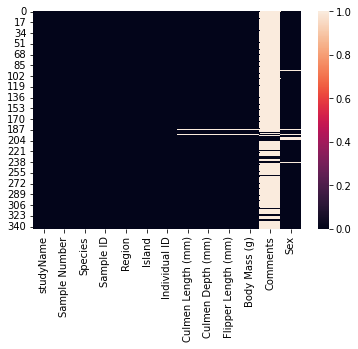

In [23]:
# Visualize the NaN with seaborn heatmap
sns.heatmap(df_completed.isnull())

In [48]:
# drop Nan with threshold
df_completed.dropna(thresh=318,axis=1, inplace=True)
df_completed.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,MALE


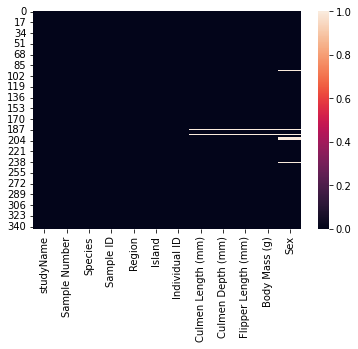

In [26]:
sns.heatmap(df_completed.isnull())

In [52]:
df_completed['Culmen Depth (mm)'].fillna(value=df_completed['Culmen Depth (mm)'].mean(), inplace=True)
df_completed['Culmen Length (mm)'].fillna(value=df_completed['Culmen Length (mm)'].mean(), inplace=True)
df_completed['Flipper Length (mm)'].fillna(value=df_completed['Flipper Length (mm)'].mean(), inplace=True)

In [53]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Sample ID            344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Culmen Length (mm)   344 non-null    float64
 8   Culmen Depth (mm)    344 non-null    float64
 9   Flipper Length (mm)  344 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 34.9+ KB
